# Inteligência Artificial Aplicada a Finanças

# Projeto 3 - Otimização Avançada de Portfólio com IA

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

![title](imagens/projeto3.png)

## Parte 2 - Análise Exploratória dos Dados

### Instalando e Carregando Pacotes

In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
!pip install -q -U plotly

In [4]:
# Imports
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import holidays
import matplotlib
import plotly

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

matplotlib 3.2.1
holidays   0.10.3
seaborn    0.10.1
pandas     1.1.3
plotly     4.11.0
Data Science Academy


### Explorando Informações Básicas do Conjunto de Dados

In [6]:
# Carrega o dataset gerado na Parte 1
df_stocks = pd.read_csv("dados/stocks.csv")

In [7]:
print("Data Mais Antiga das Cotações:", df_stocks['Date'].min())
print("Data Mais Recente das Cotações:", df_stocks['Date'].max())

Data Mais Antiga das Cotações: 2009-01-02
Data Mais Recente das Cotações: 2019-12-31


In [8]:
# Verificando se temos valores nulos
pd.pivot_table(df_stocks, values = 'Close', index = ['Date'], columns = ['ticker']).isnull().values.any()

False

### Coleta de Dados Para Dias da Semana, Exceto Feriados Nacionais

In [9]:
# Definindo o país
us_holidays = holidays.US()

In [10]:
# Extraindo as datas que sejam coincidentes com feriados
df_stocks['Holiday'] = df_stocks.Date.apply(lambda x: x in us_holidays)

In [11]:
df_stocks['Holiday'].head()

0    False
1    False
2    False
3    False
4    False
Name: Holiday, dtype: bool

In [12]:
# Convertendo data para o tipo datatime
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

In [13]:
# Convertendo dia para o nome do dia
df_stocks['Day'] = df_stocks['Date'].dt.day_name()

In [14]:
# Extraindo somente os dias que não sejam feriados
df_stocks = df_stocks.loc[df_stocks['Holiday'] == False]

In [15]:
# Extraindo os dias que não sejam sábado ou domingo
df_stocks = df_stocks.loc[~df_stocks.Day.isin(['Saturday', 'Sunday'])]

In [16]:
df_stocks.head()

Unnamed: 0       Date      Open      High       Low     Close ticker  \
0           0 2009-01-02  3.067143  3.251429  3.041429  3.241071   AAPL   
1           1 2009-01-05  3.327500  3.435000  3.311071  3.377857   AAPL   
2           2 2009-01-06  3.426786  3.470357  3.299643  3.322143   AAPL   
3           3 2009-01-07  3.278929  3.303571  3.223572  3.250357   AAPL   
4           4 2009-01-08  3.229643  3.326786  3.215714  3.310714   AAPL   

   Holiday        Day  
0    False     Friday  
1    False     Monday  
2    False    Tuesday  
3    False  Wednesday  
4    False   Thursday

### Calculando os Retornos dos Ativos Financeiros

In [17]:
# Lista para receber o cálculo
list_of_stock = []

# Loop para o cálculo do retorno
for tick in list(set(df_stocks['ticker'])):
    df = df_stocks.loc[df_stocks['ticker'] == tick]
    df['daily return'] = df['Close'].pct_change(1)
    list_of_stock.append(df)
    
returns_stocks = pd.concat(list_of_stock)

In [18]:
returns_stocks.head()

Unnamed: 0       Date       Open       High        Low      Close  \
2768           0 2009-01-02  80.059998  82.110001  78.900002  81.639999   
2769           1 2009-01-05  81.269997  82.419998  80.680000  81.629997   
2770           2 2009-01-06  82.139999  82.730003  79.629997  80.300003   
2771           3 2009-01-07  79.250000  80.190002  77.559998  78.250000   
2772           4 2009-01-08  77.910004  79.570000  77.900002  79.089996   

     ticker  Holiday        Day  daily return  
2768    XOM    False     Friday           NaN  
2769    XOM    False     Monday     -0.000123  
2770    XOM    False    Tuesday     -0.016293  
2771    XOM    False  Wednesday     -0.025529  
2772    XOM    False   Thursday      0.010735

In [19]:
# Loop para a lista de retornos e imprime o resultado
for ticker in list(set(returns_stocks['ticker'])):
    temp = returns_stocks.loc[returns_stocks['ticker'] == ticker]
    print(ticker + ' tem dados para ' + str(len(set(temp.index))) + ' dias')

VMC tem dados para 2745 dias
XOM tem dados para 2745 dias
TGT tem dados para 2745 dias
STT tem dados para 2745 dias
JPM tem dados para 2745 dias
BA tem dados para 2745 dias
AMZN tem dados para 2745 dias
MSFT tem dados para 2745 dias
AAPL tem dados para 2745 dias
VZ tem dados para 2745 dias
KO tem dados para 2745 dias
GOOGL tem dados para 2745 dias
SPG tem dados para 2745 dias
XEL tem dados para 2745 dias
WMT tem dados para 2745 dias
UNH tem dados para 2745 dias


### Plot Interativos dos Retornos Por Ano

tickers = ['AAPL', 'XOM' ,'VMC', 'BA', 'AMZN', 'TGT', 'WMT', 'KO', 'UNH', 'JPM', 'GOOGL', 'STT', 'MSFT', 'VZ', 'XEL', 'SPG']

In [20]:
# Reshaping dos dados para plotagem

# Converte a coluna Date para o tipo datetime
returns_stocks['Date'] = pd.to_datetime(returns_stocks['Date'])

# Cria uma máscara de filtro
filter_mask = returns_stocks['Date'] > pd.Timestamp(2016, 1, 1)

# Aplica a máscara
filtered_df = returns_stocks[filter_mask]

# Faz o reshape dos dados usando Date como índice, usando ticker como coluna e daily return como valor
returns_stocks_reshaped = filtered_df.pivot(index = 'Date', columns = 'ticker', values = 'daily return')

# Reset do index
returns_stocks_reshaped = returns_stocks_reshaped.reset_index()

In [21]:
# Mostrando várias ações no mesmo gráfico, em 2019

fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AAPL'],
                name = "Apple",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AMZN'],
                name = "Amazon",
                line_color ='green',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['GOOGL'],
                name = "Google",
                line_color ='blue',
                opacity = 0.5))

# Usa a data no eixo x
fig.update_layout(xaxis_range = ['2019-01-01','2019-12-31'], title_text = 'Retornos das Ações [Ano - 2019]')
fig.update_yaxes(title_text = 'Retornos')
fig.update_xaxes(title_text = 'Período de Tempo')
fig.show()

In [22]:
# Mostrando várias ações no mesmo gráfico, em 2018

fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AAPL'],
                name = "Apple",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AMZN'],
                name = "Amazon",
                line_color ='green',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['GOOGL'],
                name = "Google",
                line_color ='blue',
                opacity = 0.5))


# Usa a data no eixo x
fig.update_layout(xaxis_range = ['2018-01-01','2018-12-31'], title_text = 'Retornos das Ações [Ano - 2018]')
fig.update_yaxes(title_text = 'Retornos')
fig.update_xaxes(title_text = 'Período de Tempo')
fig.show()

In [23]:
# Mostrando várias ações no mesmo gráfico, em 2017

fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AAPL'],
                name = "Apple",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AMZN'],
                name = "Amazon",
                line_color ='green',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['GOOGL'],
                name = "Google",
                line_color ='blue',
                opacity = 0.5))


# Usa a data no eixo x
fig.update_layout(xaxis_range = ['2017-01-01','2017-12-31'], title_text = 'Retornos das Ações [Ano - 2017]')
fig.update_yaxes(title_text = 'Retornos')
fig.update_xaxes(title_text = 'Período de Tempo')
fig.show()

### Gerando Mapas de Calor e Plots de Correlação

In [24]:
# Define o índice
df_stocks.set_index('Date', inplace=True)

In [25]:
# Faz o pivot e organiza os dados para calcular a correlação
corr_df = pd.pivot_table(df_stocks, values = 'Close', index = ['Date'], columns = ['ticker'])

In [26]:
# Calcula a correlação
correlation_stocks = corr_df.corr()

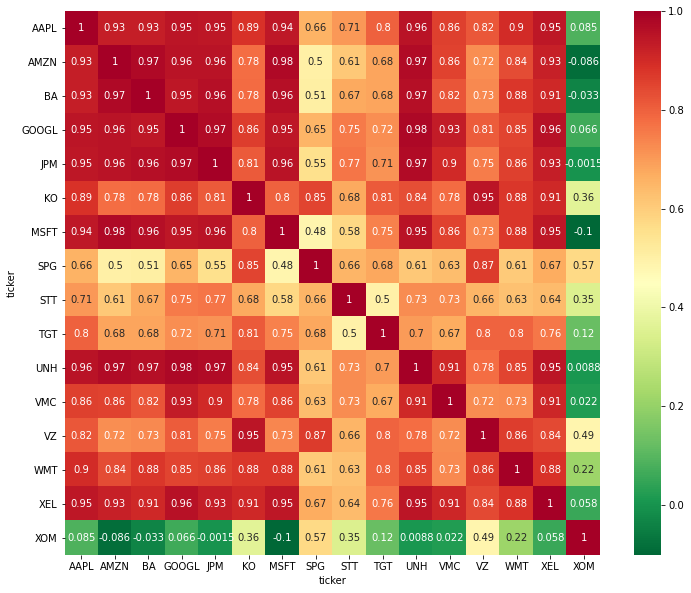

In [27]:
# Gera o gráfico e salva em disco
plt.figure(figsize=(12, 10))
sns_plot = sns.heatmap(correlation_stocks, annot=True, cmap="RdYlGn_r")
plt.savefig('graficos/correlacao.png')

# Fim